**Question 1**: Use yfinance to Extract Stock Data

In [1]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display first five rows
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


**Question 2**: Use Web Scraping to Extract Tesla Revenue Data
python
Copy
Edit


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")

# Find the correct table manually by checking headings
tesla_revenue = []

# Look for all tables and find the one that has 'Tesla Quarterly Revenue'
for table in soup.find_all("table"):
    if "Tesla Quarterly Revenue" in table.text:
        for row in table.find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue != "":
                    tesla_revenue.append({"Date": date, "Revenue": revenue})
        break

# Convert to DataFrame and show result
if tesla_revenue:
    tesla_revenue = pd.DataFrame(tesla_revenue)
    print(tesla_revenue.tail())
else:
    print("Tesla revenue data not found.")


          Date Revenue
57  2010-09-30      31
58  2010-06-30      28
59  2010-03-31      21
60  2009-09-30      46
61  2009-06-30      27


**Question 3**: Use yfinance to Extract GME Stock Data

In [10]:
# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display first five rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


**Question 4**: Use Web Scraping to Extract GME Revenue Data

In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")

# Prepare to collect revenue data
gme_revenue = []

# Loop through tables to find the one with 'GameStop Quarterly Revenue'
for table in soup.find_all("table"):
    if "GameStop Quarterly Revenue" in table.text:
        for row in table.find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue != "":
                    gme_revenue.append({"Date": date, "Revenue": revenue})
        break  # Stop after finding the right table

# Convert to DataFrame and display
if gme_revenue:
    gme_revenue = pd.DataFrame(gme_revenue)
    print(gme_revenue.tail())
else:
    print("GameStop revenue data not found.")


          Date Revenue
60  2010-01-31    3524
61  2009-10-31    1835
62  2009-07-31    1739
63  2009-04-30    1981
64  2009-01-31    3492


**Question 5**: Plot Tesla Stock Graph

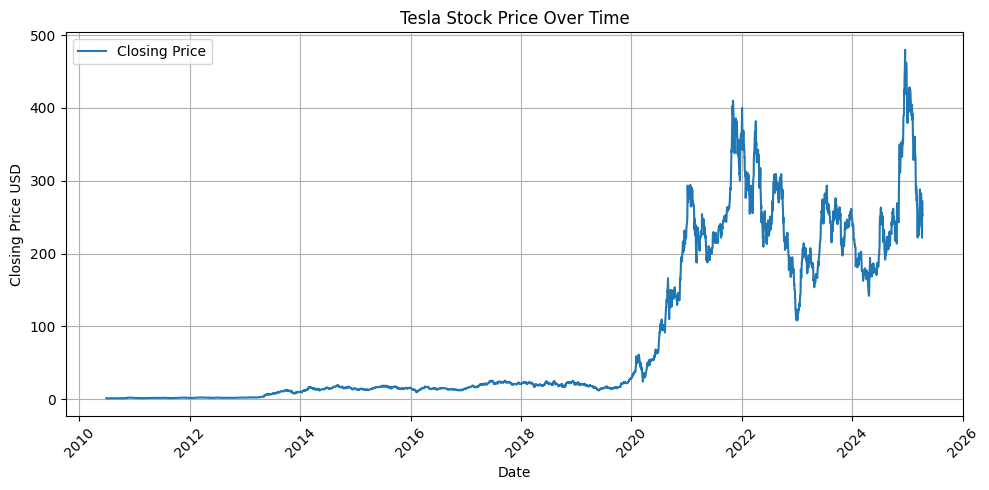

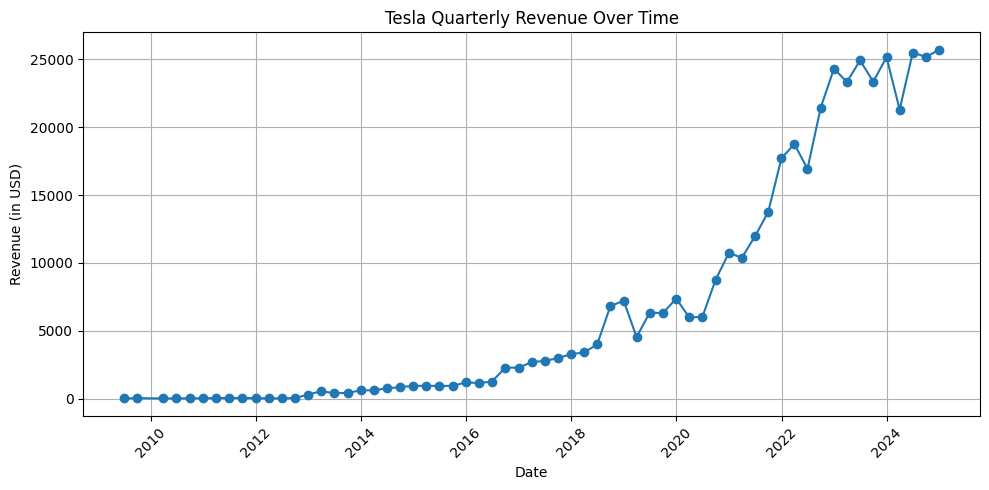

In [16]:
# Stock price graph using yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Plot Tesla stock price
def make_graph(stock_data, title):
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price USD')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()

make_graph(tesla_data, "Tesla Stock Price Over Time")

# Tesla Revenue Graph
import requests
from bs4 import BeautifulSoup

# Get Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")

tesla_revenue = []
for table in soup.find_all("table"):
    if "Tesla Quarterly Revenue" in table.text:
        for row in table.find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:
                    tesla_revenue.append({"Date": date, "Revenue": revenue})
        break

tesla_revenue = pd.DataFrame(tesla_revenue)
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])

# Plot Tesla Revenue
plt.figure(figsize=(10, 5))
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], marker='o')
plt.title("Tesla Quarterly Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (in USD)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Question 6**: Plot GameStop Stock Graph
python
Copy
Edit


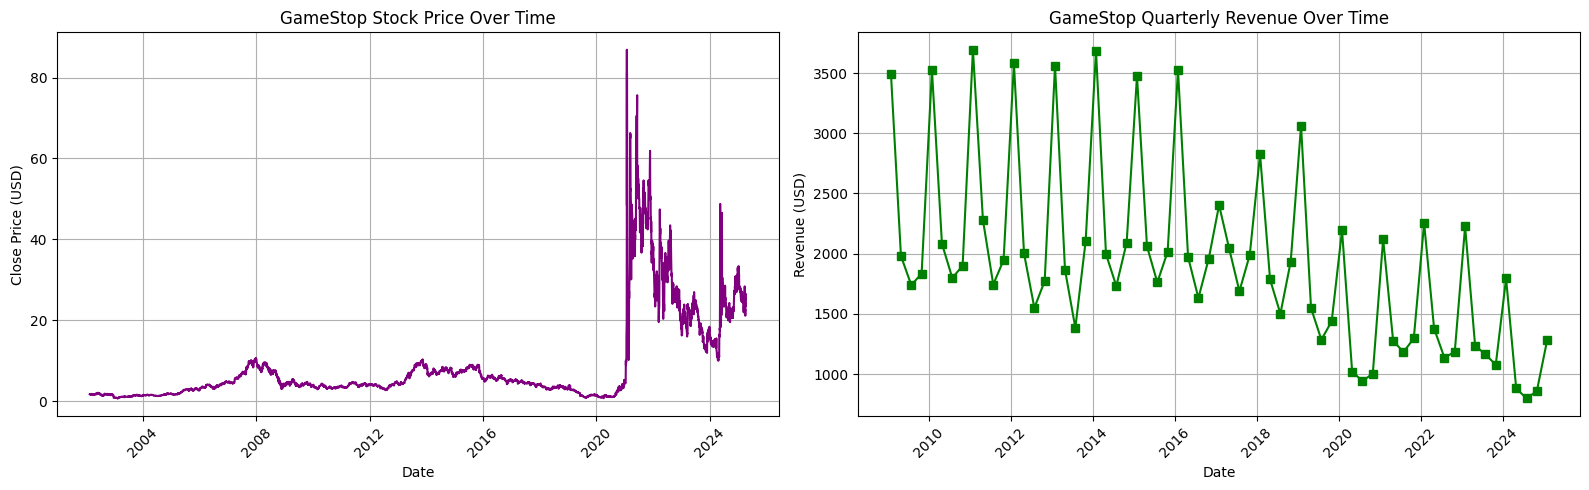

In [19]:
# Fetch GME stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Fetch GME revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")

gme_revenue = []
for table in soup.find_all("table"):
    if "GameStop Quarterly Revenue" in table.text:
        for row in table.find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:
                    gme_revenue.append({"Date": date, "Revenue": revenue})
        break

gme_revenue = pd.DataFrame(gme_revenue)
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])

# --- Plot side by side ---
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Stock Price
axes[0].plot(gme_data['Date'], gme_data['Close'], label='Close Price', color='purple')
axes[0].set_title("GameStop Stock Price Over Time")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Close Price (USD)")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Revenue
axes[1].plot(gme_revenue["Date"], gme_revenue["Revenue"], marker='s', color='green')
axes[1].set_title("GameStop Quarterly Revenue Over Time")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Revenue (USD)")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()


**Question 5**: Plot Tesla Stock Graph

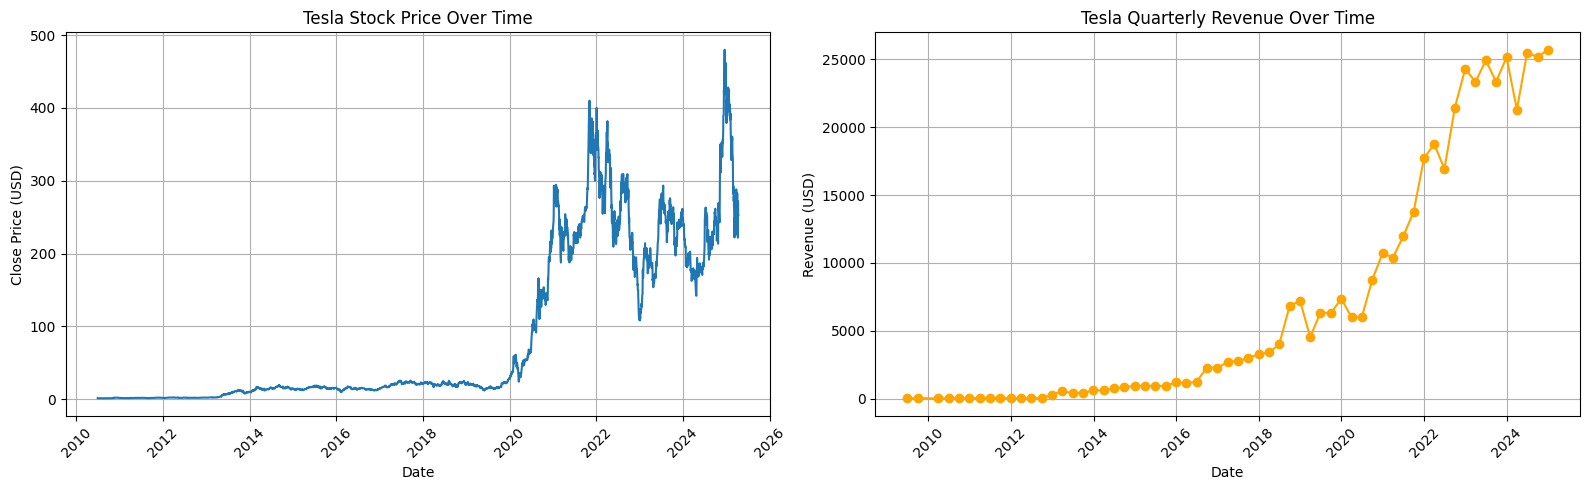

In [18]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Fetch Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0"}
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")

tesla_revenue = []
for table in soup.find_all("table"):
    if "Tesla Quarterly Revenue" in table.text:
        for row in table.find_all("tr"):
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:
                    tesla_revenue.append({"Date": date, "Revenue": revenue})
        break

tesla_revenue = pd.DataFrame(tesla_revenue)
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])

# --- Plot side by side ---
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Stock Price
axes[0].plot(tesla_data['Date'], tesla_data['Close'], label='Close Price')
axes[0].set_title("Tesla Stock Price Over Time")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Close Price (USD)")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Revenue
axes[1].plot(tesla_revenue["Date"], tesla_revenue["Revenue"], marker='o', color='orange')
axes[1].set_title("Tesla Quarterly Revenue Over Time")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Revenue (USD)")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

plt.tight_layout()
plt.show()
